Preprocessing

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, auc
import statsmodels.api as sm
from sklearn.inspection import permutation_importance

In [2]:
# Reading files
data_client = pd.read_csv('data_files/client.csv')
data_invoice = pd.read_csv('data_files/invoice.csv')

Looking Through data / data cleaning

In [3]:
# Looking at header and data
print(data_client.head())

print(data_client.count())


   region        date  dis    id  catg  target
0     101  31/12/1994   60     0    11       0
1     107   29/5/2002   69     1    11       0
2     301   13/3/1986   62    10    11       0
3     105   11/7/1996   69   100    11       0
4     303  14/10/2014   62  1000    11       0
region    21652
date      21652
dis       21652
id        21652
catg      21652
target    21652
dtype: int64


In [4]:
print(data_invoice.head())

print(data_invoice.count())

   id        date  tarif_type  counter_statue  reading_remarque  \
0   0   24/3/2014          11               0                 8   
1   0   29/3/2013          11               0                 6   
2   0   23/3/2015          11               0                 8   
3   0   13/7/2015          11               0                 8   
4   0  17/11/2016          11               0                 9   

   consommation_level_4  months_number counter_type  counter_coefficient  \
0                     0              4         ELEC                    1   
1                     0              4         ELEC                    1   
2                     0              4         ELEC                    1   
3                     0              4         ELEC                    1   
4                     0             12         ELEC                    1   

   consommation_level_1  consommation_level_2  consommation_level_3  
0                    82                     0                     0  


In [5]:
# Check for missing data in client
data_client.isna().any()

region    False
date      False
dis       False
id        False
catg      False
target    False
dtype: bool

In [6]:
# Check for missing data in invoice
data_invoice.isna().any()

id                      False
date                    False
tarif_type              False
counter_statue          False
reading_remarque        False
consommation_level_4    False
months_number           False
counter_type            False
counter_coefficient     False
consommation_level_1    False
consommation_level_2    False
consommation_level_3    False
dtype: bool

There are no missing values in the dataset

In [7]:
# Drop duplicates
data_client.drop_duplicates(inplace=True)
data_invoice.drop_duplicates(inplace=True)


There are no duplicate values in the dataset as well

In [8]:
# Checking for number of unique values for each column
print(data_client.nunique())
print(data_invoice.nunique())

# Seeing what unique values there are for dis/catg columns
print(data_client.dis.unique())
print(data_client.catg.unique())

region       24
date       5984
dis           4
id        21652
catg          3
target        2
dtype: int64
id                      21652
date                     5538
tarif_type                 12
counter_statue              6
reading_remarque            4
consommation_level_4     4773
months_number             152
counter_type                2
counter_coefficient         4
consommation_level_1     3795
consommation_level_2     5348
consommation_level_3     1296
dtype: int64
[60 69 62 63]
[11 12 51]


Data Visualisation

<BarContainer object of 2 artists>

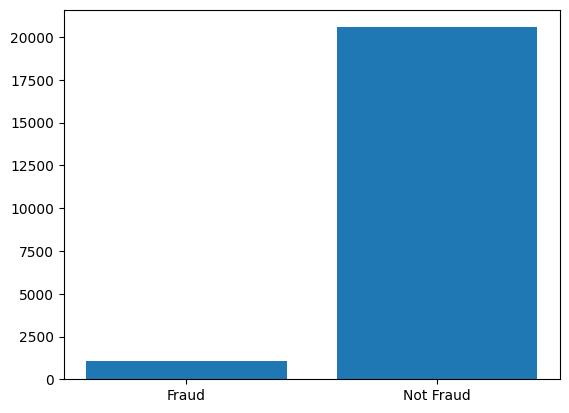

In [9]:
# Visualise dependent variable
fraud_c = data_client[data_client['target'] == 1]
not_fraud_c = data_client[data_client['target'] == 0]


plt.bar(['Fraud', 'Not Fraud'], [len(fraud_c), len(not_fraud_c)])

Significantly larger number of clients are not fraudulent compare to fraudulent clients, showcasing an imbalance dataset.

Visualising Client data to get insights

dis 
      fraud_count  not_fraud_count  client_count  percentage_of_fraud  \
dis                                                                    
60           187             5064          5251             3.561226   
62           295             6329          6624             4.453502   
63           212             4013          4225             5.017751   
69           382             5170          5552             6.880403   

     percentage_not_fraud  
dis                        
60              96.438774  
62              95.546498  
63              94.982249  
69              93.119597  


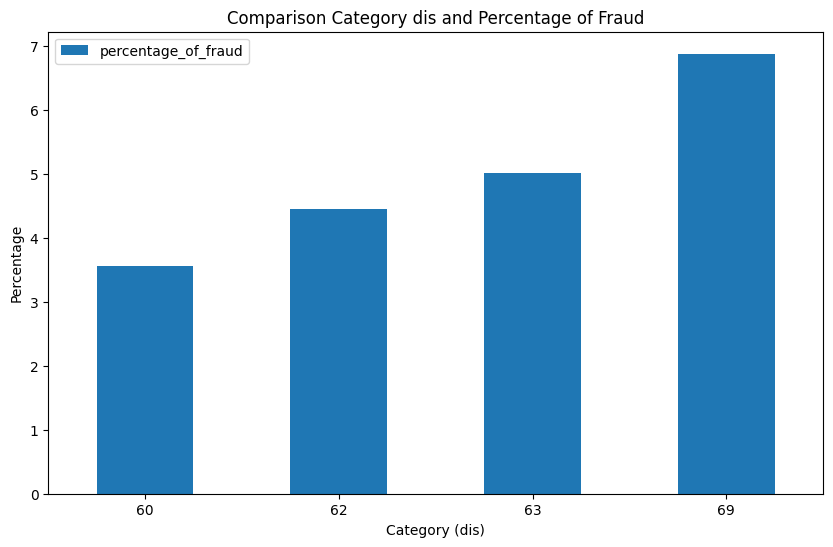

catg 
       fraud_count  not_fraud_count  client_count  percentage_of_fraud  \
catg                                                                    
11           1021            20051         21072             4.845292   
12             19              369           388             4.896907   
51             36              156           192            18.750000   

      percentage_not_fraud  
catg                        
11               95.154708  
12               95.103093  
51               81.250000  


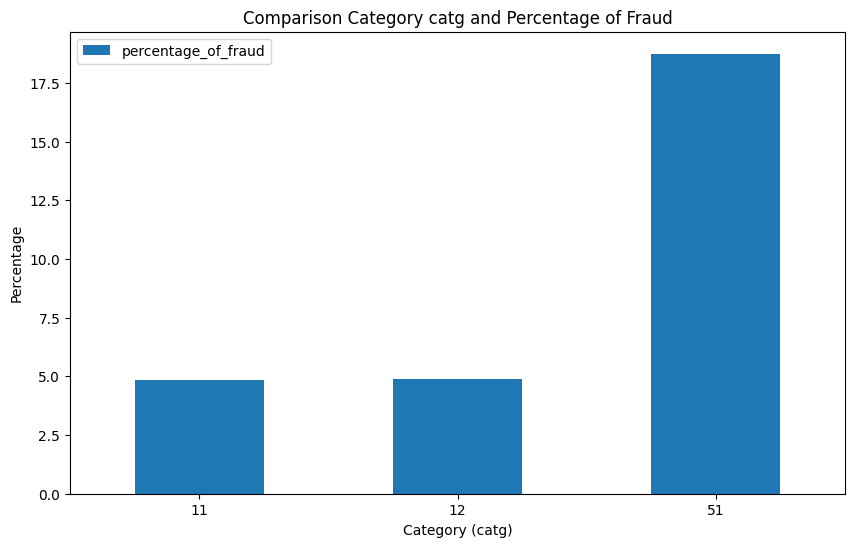

region 
         fraud_count  not_fraud_count  client_count  percentage_of_fraud  \
region                                                                    
101             195             5303          5498             3.546744   
103             132             1233          1365             9.670330   
104             113             2004          2117             5.337742   
105              10              252           262             3.816794   
106              11               97           108            10.185185   
107             115             1564          1679             6.849315   
206               1               20            21             4.761905   
301              49             1512          1561             3.139013   
302              49              683           732             6.693989   
303              29              897           926             3.131749   
304              16              525           541             2.957486   
305             

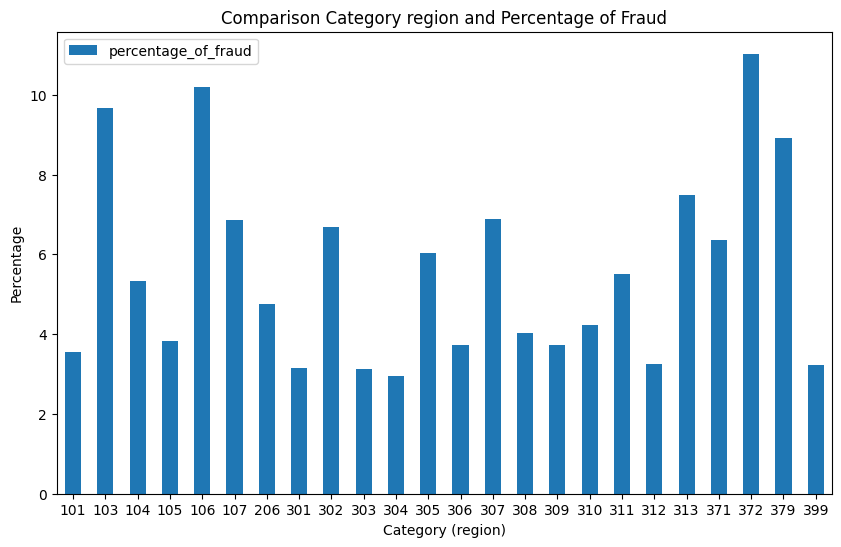

In [10]:
# Visualising categorical data in client dataset
for i in ['dis', 'catg', 'region']:
    # Getting the counts of each client category
    fraud_count = fraud_c[i].value_counts()
    client_count = data_client[i].value_counts()
    not_fraud_count = not_fraud_c[i].value_counts()

    # Calculating the percentage of fraud and non-fraud data for each variable as a percentage of client data
    percentage_of_fraud= (fraud_count / client_count) * 100
    percentage_not_fraud = (not_fraud_count / client_count) * 100

    # Fitting data into dataframe
    comparison = pd.DataFrame({
        'fraud_count': fraud_count,
        'not_fraud_count': not_fraud_count,
        'client_count': client_count,
        'percentage_of_fraud': percentage_of_fraud,
        'percentage_not_fraud': percentage_not_fraud
    })

    print(f'{i} \n', comparison)
    
    # Creating a bar plot for the percentage
    comparison[['percentage_of_fraud']].plot(kind='bar', figsize=(10, 6))

    # Setting title and labels
    plt.title(f'Comparison Category {i} and Percentage of Fraud')
    plt.xlabel(f'Category ({i})')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)

    # Displaying plot
    plt.show()

dis

- The number of client in each district is relatively equal. There is not much differences between the number of clients in each district as compared to catg to give an example. Additionally, the difference in percentage of fraud is between the district with the lowest and highest percentage of fraud only differs by about 3.3%. However, it is seen that there is a difference between every district, do we will conduct further investigation to determine if we should drop this variable.


catg

- It can be seen that even though there are a lot less catg 51 clients, there odds of a client being fraudulant are significantly higher than that of clients in other catg, at almost 5 times more likely. This can be seen in the bar plot below as well.


region

- It can be seen that the number of client in each region varies as well as that the percentage of clients being fraudulant also varies. Thus, we train this variable into our model and see how it can affect our results.

In [11]:
for i in ['dis', 'catg', 'region']:
    # Evaluating the significance of categorical variables with respect to the target variable
    contingency_table = pd.crosstab(data_client[i], data_client['target'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    print(f"{i}\nChi-Square Statistic: {chi2}, p-value: {p}")

dis
Chi-Square Statistic: 68.73581935022222, p-value: 7.960199761160285e-15
catg
Chi-Square Statistic: 77.89922790072318, p-value: 1.2145001956281495e-17
region
Chi-Square Statistic: 172.14218213354502, p-value: 8.241432853155254e-25


Using the Chi-Square Test of Independence, it can be seen that all categorical variables in the client dataset is satistically significant, as all their p-values are p < 0.05. Thus, we will first leave all variables to be trained in our machine learning algorithm.

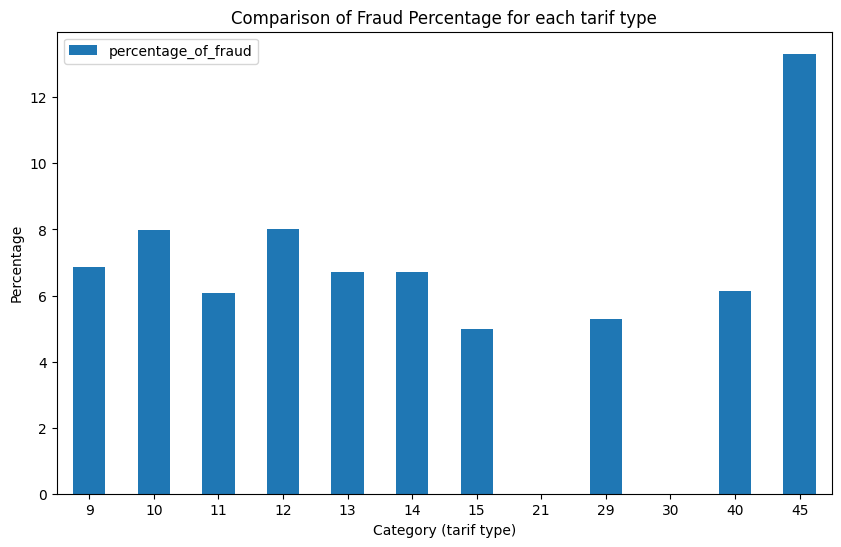

In [12]:
# Splitting invoice data into fraud and not fraud
fraud_i = data_invoice[data_invoice['id'].isin(fraud_c['id'])]
not_fraud_i = data_invoice[data_invoice['id'].isin(not_fraud_c['id'])]

# Getting the counts of each tarif type
fraud_tarif = fraud_i['tarif_type'].value_counts()
invoice_tarif = data_invoice['tarif_type'].value_counts()

# Calculating the percentage of fraud data for each tarif type as a percentage of client data
percentage_of_fraud = (fraud_tarif / invoice_tarif) * 100

# Fitting data into dataframe
comparison = pd.DataFrame({
    'fraud_tarif': fraud_tarif,
    'invoice_tarif': invoice_tarif,
    'percentage_of_fraud': percentage_of_fraud
})

# Creating a bar plot for the percentage
comparison[['percentage_of_fraud']].plot(kind='bar', figsize=(10, 6))

# Setting title and labels
plt.title('Comparison of Fraud Percentage for each tarif type')
plt.xlabel('Category (tarif type)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Displaying plot
plt.show()

It can be seen that the tarif type does not really affect the probability of an invoice being from a fraudulant client, as the bar graph above is actually quite horizontal throughout, with the exception of tarif type 45 that is almost twice as likely. However this may not be significant in the whole scheme of things, so we will further investigate the other features.

In [13]:
print(fraud_tarif)
print(invoice_tarif)

tarif_type
11    21821
40     5420
10     3781
15      120
45       63
12       34
9        32
29       31
14       30
13       30
Name: count, dtype: int64
tarif_type
11    359560
40     88482
10     47285
15      2405
29       587
45       473
9        466
13       446
14       446
12       425
30        19
21        17
Name: count, dtype: int64


Viewing the number of each value of tarif to see if there are big differences between tarif types. It can be seen that tarif type 11 is much higher than the other values.

In [14]:
merged_df = pd.merge(data_invoice, data_client, on='id', how='inner')
for i in ['tarif_type', 'counter_statue', 'counter_type']:
    # Evaluating the significance of categorical variables with respect to the target variable
    contingency_table = pd.crosstab(merged_df[i], merged_df['target'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 320.7354307026131, p-value: 3.712248147090872e-62
Chi-Square Statistic: 23.783567918825717, p-value: 0.00023892055698261985
Chi-Square Statistic: 1.9061354716353593, p-value: 0.1673931693261903


Using Chi-Square test of independence, it can be seen that the p-value of counter type > 0.05 thus it is not statistically significant, and we will drop the column from our analysis. 

In [15]:
# List of consumption level columns
consumption_cols = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'reading_remarque']

# Calculate min, max, and average for the consumption columns
min_values_f = fraud_i[consumption_cols].min()
max_values_f = fraud_i[consumption_cols].max()
mean_values_f = fraud_i[consumption_cols].mean()

min_values_n = not_fraud_i[consumption_cols].min()
max_values_n = not_fraud_i[consumption_cols].max()
mean_values_n = not_fraud_i[consumption_cols].mean()

# Display the results
print("Minimum values: \nFraud" )
print(min_values_f)
print("Not Fraud")
print(min_values_n)

print("\nMaximum values: \nFraud")
print(max_values_f)
print("Not Fraud")
print(max_values_n)

print("\nAverage values: \nFraud")
print(mean_values_f)
print("Not Fraud")
print(mean_values_n)

Minimum values: 
Fraud
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
reading_remarque        6
dtype: int64
Not Fraud
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
reading_remarque        6
dtype: int64

Maximum values: 
Fraud
consommation_level_1     30080
consommation_level_2     25997
consommation_level_3      5345
consommation_level_4    116145
reading_remarque             9
dtype: int64
Not Fraud
consommation_level_1     98889
consommation_level_2    819886
consommation_level_3     45360
consommation_level_4    343568
reading_remarque             9
dtype: int64

Average values: 
Fraud
consommation_level_1    499.839774
consommation_level_2    160.204547
consommation_level_3     53.134335
consommation_level_4    127.809387
reading_remarque          7.555864
dtype: float64
Not Fraud
consommation_level_1    439.308751
consommation_level_2    117.865928
consommation_leve

It can be seen that the min consommation for all categories looked at above is 0. Thus, we will not be taking into account the min consommation levels. To further gain insights on the above data, we are using bar plots to visualise the differences for each value.

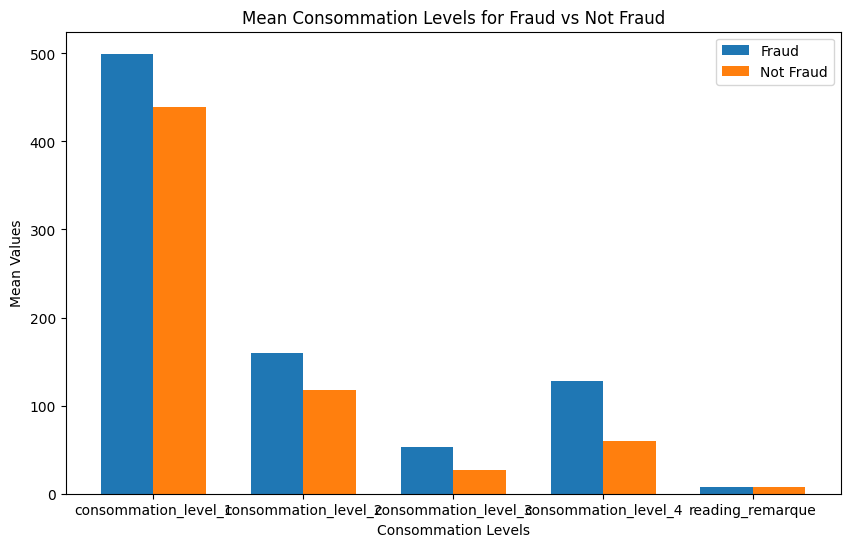

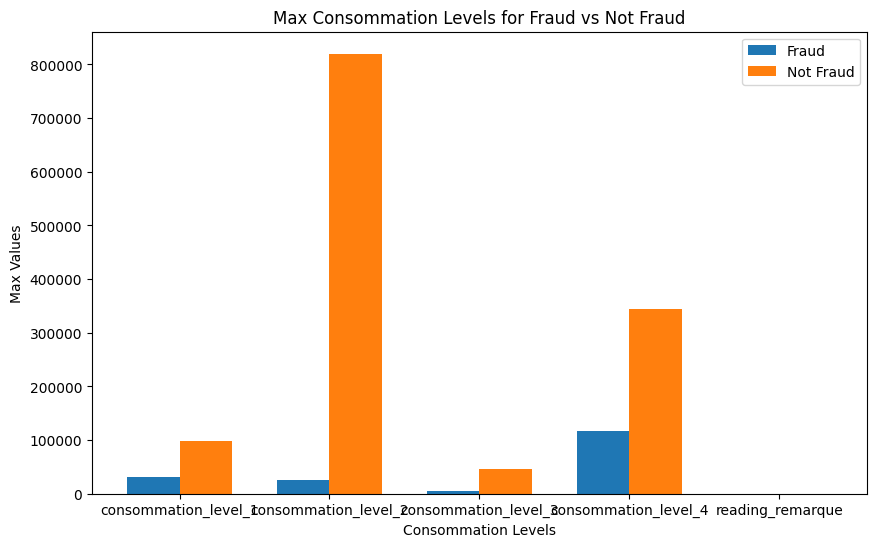

In [16]:
def plot_consommation_graphs(fraud_data, not_fraud_data, title):
    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Get a range for the x-axis labels
    index = np.arange(len(consumption_cols))

    # Define the bar width
    bar_width = 0.35

    # Plot the fraud and not fraud means side by side
    bar1 = ax.bar(index, fraud_data, bar_width, label='Fraud')
    bar2 = ax.bar(index + bar_width, not_fraud_data, bar_width, label='Not Fraud')

    # Adding labels, title, and x-axis ticks
    ax.set_xlabel('Consommation Levels')
    ax.set_ylabel(f'{title} Values')
    ax.set_title(f'{title} Consommation Levels for Fraud vs Not Fraud')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(consumption_cols)
    ax.legend()

    # Displaying plot
    plt.show()

# Viewing graphs for mean and max consommation level
plot_consommation_graphs(mean_values_f, mean_values_n, 'Mean')
plot_consommation_graphs(max_values_f, max_values_n, 'Max')

It can be seen that the mean consommation level for fraud invoices are always higher than that of non-fraudulant invoices, yet the max consommation level for fraud is much less than that of not fraud at all consommation levels. 


We we will be looking at backward selection to give more insights on the features we will be using in our classifiers.

Feature Engineering

In [17]:
# Convert date column to datetime
data_client['date'] = pd.to_datetime(data_client['date'])

# Extract year, month, and tenure
data_client['year_joined'] = data_client['date'].dt.year
data_client['month_joined'] = data_client['date'].dt.month
data_client['tenure'] = (pd.to_datetime('today') - data_client['date']).dt.days

# Convert to datetime and extract features
data_invoice['date'] = pd.to_datetime(data_invoice['date'])
data_invoice['year'] = data_invoice['date'].dt.year
data_invoice['month'] = data_invoice['date'].dt.month
data_invoice['days_since_last_invoice'] = (pd.to_datetime('today') - data_invoice['date']).dt.days

print(data_client.head())
print(data_invoice.head())

/var/folders/t2/_hypj1cj7gj6b3j_nd6zhsgr0000gn/T/ipykernel_45454/1726339021.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_client['date'] = pd.to_datetime(data_client['date'])
/var/folders/t2/_hypj1cj7gj6b3j_nd6zhsgr0000gn/T/ipykernel_45454/1726339021.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_invoice['date'] = pd.to_datetime(data_invoice['date'])


   region       date  dis    id  catg  target  year_joined  month_joined  \
0     101 1994-12-31   60     0    11       0         1994            12   
1     107 2002-05-29   69     1    11       0         2002             5   
2     301 1986-03-13   62    10    11       0         1986             3   
3     105 1996-07-11   69   100    11       0         1996             7   
4     303 2014-10-14   62  1000    11       0         2014            10   

   tenure  
0   10896  
1    8190  
2   14111  
3   10338  
4    3669  
   id       date  tarif_type  counter_statue  reading_remarque  \
0   0 2014-03-24          11               0                 8   
1   0 2013-03-29          11               0                 6   
2   0 2015-03-23          11               0                 8   
3   0 2015-07-13          11               0                 8   
4   0 2016-11-17          11               0                 9   

   consommation_level_4  months_number counter_type  counter_coefficient  

Changing all string date data to date-time data types to be better used in the model. Additionally, extracting the months, years and days, so that it is easier to be used in the model.

In [18]:
data_invoice = data_invoice.drop(columns=['date', 'year', 'month', 'months_number', 'counter_type', 'tarif_type', 'counter_coefficient', 'consommation_level_2'])
data_client = data_client.drop(columns=['date', 'year_joined', 'month_joined'])

Based on above analysis and backward selection of features, we have dropped the above columns to improve classificaton of model.

In [19]:

agg_invoice = data_invoice.groupby('id').agg({
    'consommation_level_1': ['mean', 'min', 'max'],
    'consommation_level_3': ['mean', 'min', 'max'],
    'consommation_level_4': ['mean', 'min', 'max'],
    'reading_remarque': ['min','max'],
})
# Flatten the MultiIndex columns in agg_merged
agg_invoice.columns = ['_'.join(col).strip() for col in agg_invoice.columns.values]
agg_invoice.reset_index(inplace=True)

# Merge data_merged with the aggregated statistics
data_invoice = pd.merge(data_invoice, agg_invoice, on='id', how='inner')

numeric = ['consommation_level_1', 'consommation_level_3', 'consommation_level_4', 'consommation_level_1_min', 'consommation_level_1_max', 'consommation_level_1_mean', 'consommation_level_3_min', 'consommation_level_3_max', 'consommation_level_3_mean', 'consommation_level_4_min', 'consommation_level_4_max', 'consommation_level_4_mean', 'reading_remarque', 'reading_remarque_max', 'reading_remarque_min']
data_invoice[numeric] = StandardScaler().fit_transform(data_invoice[numeric])

data_merged = pd.merge(data_invoice, data_client, on='id', how='inner')
# Display the first few rows to confirm the merge worked
print(data_merged.head())


   id  counter_statue  reading_remarque  consommation_level_4  \
0   0               0          0.390114             -0.052334   
1   0               0         -1.065066             -0.052334   
2   0               0          0.390114             -0.052334   
3   0               0          0.390114             -0.052334   
4   0               0          1.117704             -0.052334   

   consommation_level_1  consommation_level_3  days_since_last_invoice  \
0             -0.609700             -0.131753                     3873   
1              1.277986             -0.131753                     4233   
2             -0.540474             -0.131753                     3509   
3             -0.575931             -0.131753                     3397   
4              0.217640             -0.131753                     2904   

   consommation_level_1_mean  consommation_level_1_min  \
0                  -0.271323                 -0.173773   
1                  -0.271323                 -0.

Looking into max, mean, min data for each client for their transactions to be used in the model. 

Standardised all numeric values to prepare to be used for logistic regression and KNN.

One-hot encoding

In [20]:
data_merged_encoded = pd.get_dummies(data_merged, columns=['dis', 'catg', 'region', 'counter_statue'], drop_first=True)
data_merged_encoded = data_merged_encoded.astype(int)
print(data_merged_encoded.head())

   id  reading_remarque  consommation_level_4  consommation_level_1  \
0   0                 0                     0                     0   
1   0                -1                     0                     1   
2   0                 0                     0                     0   
3   0                 0                     0                     0   
4   0                 1                     0                     0   

   consommation_level_3  days_since_last_invoice  consommation_level_1_mean  \
0                     0                     3873                          0   
1                     0                     4233                          0   
2                     0                     3509                          0   
3                     0                     3397                          0   
4                     0                     2904                          0   

   consommation_level_1_min  consommation_level_1_max  \
0                         0              

One-hot encoding is used for categorical data to convert categories into a numerical format that machine learning models can understand. It prevents the model from assuming any ordinal relationship between categories by representing each category as a separate binary feature, ensuring fair and unbiased learning from the data.

In [21]:
# Drop duplicates
data_merged_encoded.drop_duplicates(inplace=True)

In [22]:
xval = data_merged_encoded.drop(columns=['target', 'id'])
yval = data_merged_encoded['target']

# Split the data train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(xval, yval, test_size=0.3, random_state=0)

print('xtrain shape:', xtrain.shape)
print('xtest shape:', xtest.shape)
print('ytrain shape:', ytrain.shape)
print('ytest shape:', ytest.shape)

xtrain shape: (320621, 50)
xtest shape: (137409, 50)
ytrain shape: (320621,)
ytest shape: (137409,)


Seperated data into xtrain, ytrain to be used for model training and xtest, ytest to be used for model testing. This allows us to evaluate model performance on unseen data, ensuring it generalizes well to new information and doesn't just memorize the training data.

In [23]:
# Create the SMOTE object
smote = SMOTE(random_state=42)

# Fit and apply the oversampling
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)

# Check the class distribution
print(f"Original training set shape: {np.bincount(ytrain)}")
print(f"Resampled training set shape: {np.bincount(ytrain_resampled)}")

Original training set shape: [300210  20411]
Resampled training set shape: [300210 300210]


Due to dataset being highly imbalanced due to the significantly lower number of fraud clients compared to non fraud clients, we used oversampling to prevent the model from being biased toward the majority class. This helps improve the model's ability to correctly predict the minority class, resulting in more accurate and fairer performance on imbalanced data.

In [25]:
# Initialize the logistic regression model
logit_reg = LogisticRegression(random_state=0)

# Fit the model to the training data
logit_reg.fit(xtrain_resampled, ytrain_resampled)

y_pred_lr = logit_reg.predict(xtest)

# Print evaluation metrics
print("Accuracy:", accuracy_score(ytest, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_lr))
print("Classification Report:\n", classification_report(ytest, y_pred_lr))

Accuracy: 0.7069187607798616
Confusion Matrix:
 [[94610 33951]
 [ 6321  2527]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.82    128561
           1       0.07      0.29      0.11      8848

    accuracy                           0.71    137409
   macro avg       0.50      0.51      0.47    137409
weighted avg       0.88      0.71      0.78    137409



/Users/angxavier/Documents/GitHub/IT1244-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Initialize the KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_knn = knn.predict(xtest)

print("Accuracy:", accuracy_score(ytest, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_knn))
print("Classification Report:\n", classification_report(ytest, y_pred_knn))

Accuracy: 0.9309579430750533
Confusion Matrix:
 [[127634    927]
 [  8560    288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96    128561
           1       0.24      0.03      0.06      8848

    accuracy                           0.93    137409
   macro avg       0.59      0.51      0.51    137409
weighted avg       0.89      0.93      0.91    137409



In [30]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
rf.fit(xtrain, ytrain)

# Make predictions
y_pred_rf = rf.predict(xtest)

print("Accuracy:", accuracy_score(ytest, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_rf))
print("Classification Report:\n", classification_report(ytest, y_pred_rf))

Accuracy: 0.9693178758305496
Confusion Matrix:
 [[127805    756]
 [  3460   5388]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    128561
           1       0.88      0.61      0.72      8848

    accuracy                           0.97    137409
   macro avg       0.93      0.80      0.85    137409
weighted avg       0.97      0.97      0.97    137409



AUC-ROC: 0.5107582561408321


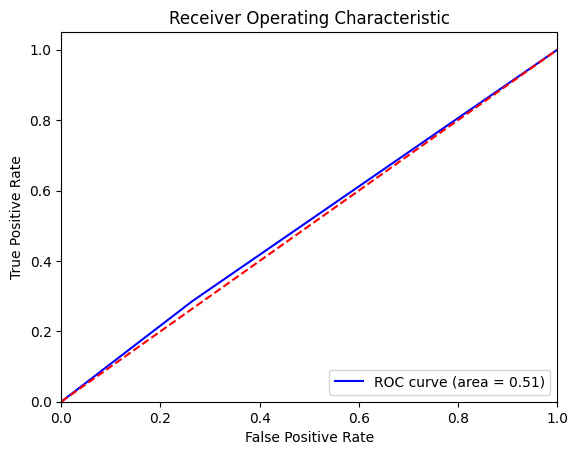

AUC-ROC: 0.5126695719468555


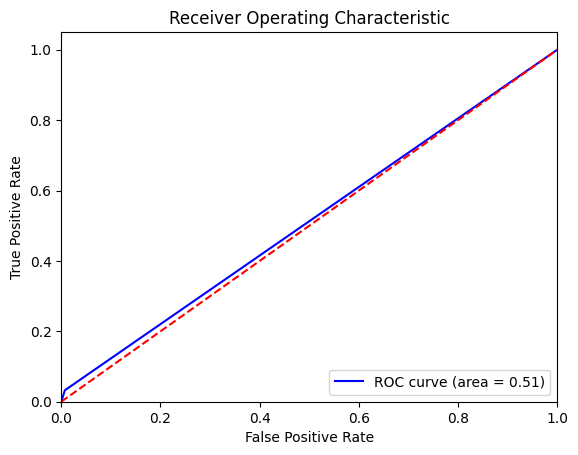

AUC-ROC: 0.8015353492174252


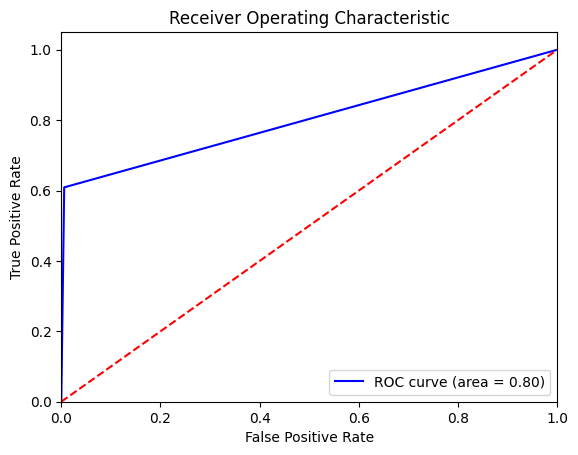

In [27]:
for i in [y_pred_lr, y_pred_knn, y_pred_rf]:
    fpr, tpr, thresholds = roc_curve(ytest, i)

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    print(f'AUC-ROC: {roc_auc}')

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [28]:
dic = {'lr':y_pred_lr, 'knn':y_pred_knn, 'rf':y_pred_rf}
for i in dic:
    precision = precision_score(ytest, dic[i])
    recall = recall_score(ytest, dic[i])
    f1 = f1_score(ytest, dic[i])

    print(i)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

lr
Precision: 0.06927463128460991
Recall: 0.28560126582278483
F1-Score: 0.11150333142125932
knn
Precision: 0.23703703703703705
Recall: 0.0325497287522604
F1-Score: 0.05723939183146179
rf
Precision: 0.876953125
Recall: 0.6089511754068716
F1-Score: 0.7187833511205977


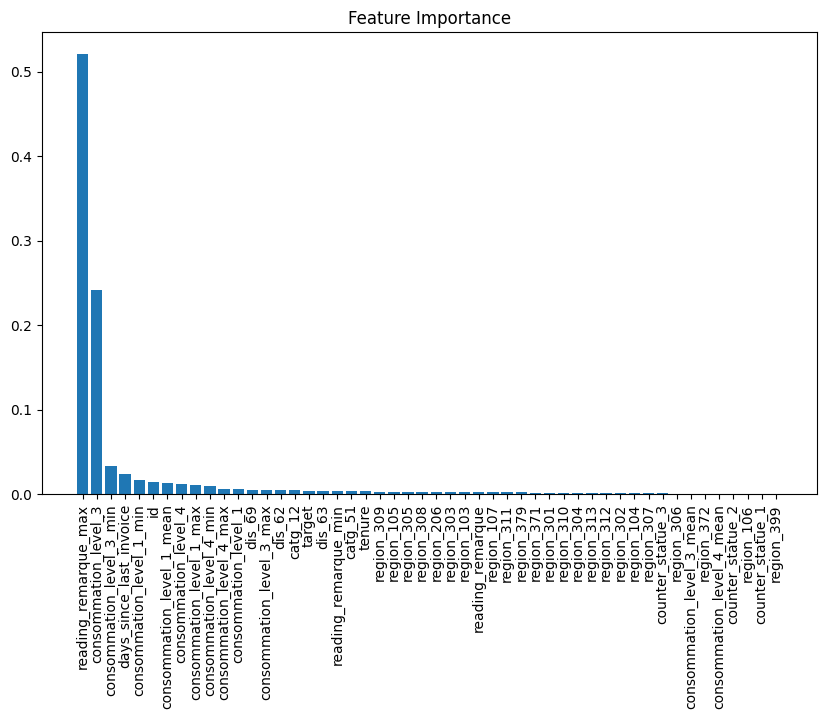

In [29]:
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(data_merged_encoded.columns)[sorted_indices], rotation=90)
plt.show()

In [27]:
# Fit the model to the training data
logit_reg.fit(xtrain_resampled, ytrain_resampled)

y_pred_train_lr = logit_reg.predict(xtrain_resampled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(ytrain_resampled, y_pred_train_lr))
print("Confusion Matrix:\n", confusion_matrix(ytrain_resampled, y_pred_train_lr))
print("Classification Report:\n", classification_report(ytrain_resampled, y_pred_train_lr))

/Users/angxavier/Documents/GitHub/IT1244-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7179357782885314
Confusion Matrix:
 [[221017  79193]
 [ 90164 210046]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72    300210
           1       0.73      0.70      0.71    300210

    accuracy                           0.72    600420
   macro avg       0.72      0.72      0.72    600420
weighted avg       0.72      0.72      0.72    600420



In [28]:
# Fit the model to the training data
knn.fit(xtrain_resampled, ytrain_resampled)

y_pred_train_knn = knn.predict(xtrain_resampled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(ytrain_resampled, y_pred_train_knn))
print("Confusion Matrix:\n", confusion_matrix(ytrain_resampled, y_pred_train_knn))
print("Classification Report:\n", classification_report(ytrain_resampled, y_pred_train_knn))

Accuracy: 0.87496585723327
Confusion Matrix:
 [[245923  54287]
 [ 20786 279424]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87    300210
           1       0.84      0.93      0.88    300210

    accuracy                           0.87    600420
   macro avg       0.88      0.87      0.87    600420
weighted avg       0.88      0.87      0.87    600420



In [32]:
# Fit the model
rf.fit(xtrain_resampled, ytrain_resampled)

# Make predictions
y_pred_train_rf = rf.predict(xtrain_resampled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(ytrain_resampled, y_pred_train_rf))
print("Confusion Matrix:\n", confusion_matrix(ytrain_resampled, y_pred_train_rf))
print("Classification Report:\n", classification_report(ytrain_resampled, y_pred_train_rf))

Accuracy: 0.9984610772459278
Confusion Matrix:
 [[299693    517]
 [   407 299803]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    300210
           1       1.00      1.00      1.00    300210

    accuracy                           1.00    600420
   macro avg       1.00      1.00      1.00    600420
weighted avg       1.00      1.00      1.00    600420



Comparing the results it can be seen that there is a large difference in performance of our model between train and test data. Thus, it can be conclude that this is a case of overfitting. Thus, we will continue investigation to prevent this problem.

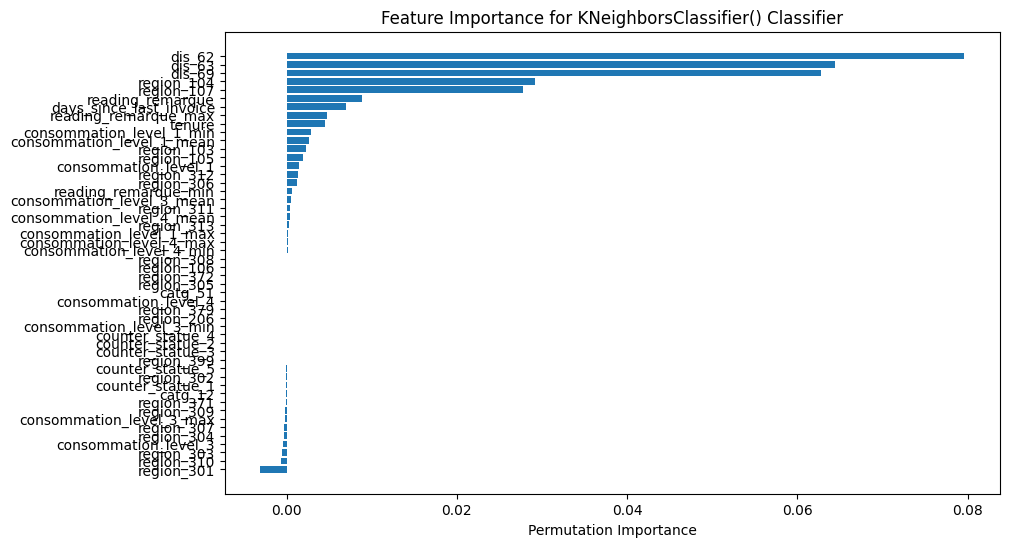

In [41]:
result = permutation_importance(logit_reg, xtest, ytest, n_repeats=10, random_state=0)

# Sort features by importance
sorted_idx = result.importances_mean.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(xtest.columns)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title(f"Feature Importance for {i} Classifier")
plt.show()

Looking at the feature importance of each classifier, looking from our objectively 'best' classifier, Random trees, the feature importance of the region variables are all quite low. However, on our models with bad precision of prediction fraud, the feature importance show that some regions put these more into account. Thus, we will be removing this column from our model as well. While the dis variable may not be as high as other variables in the feature importance of our random trees model, we will still keep it in for further investigation. 

Running a KNN algorithm with 10 repeats will take too long, thus we will just investigate based on the feature importantance of Logistic Regression and Random Trees

In [56]:
data_merged_dropped = data_merged.drop(columns=['region'])
data_merged_dropped_encoded = pd.get_dummies(data_merged_dropped, columns=['dis', 'catg', 'counter_statue'], drop_first=True)
data_merged_dropped_encoded = data_merged_dropped_encoded.astype(int)

# Drop duplicates
data_merged_dropped_encoded.drop_duplicates(inplace=True)

xval_d = data_merged_dropped_encoded.drop(columns=['target', 'id'])
yval_d = data_merged_dropped_encoded['target']

# Split the data train and test sets
xtrain_d, xtest_d, ytrain_d, ytest_d = train_test_split(xval_d, yval_d, test_size=0.3, random_state=0)

print('xtrain shape:', xtrain_d.shape)
print('xtest shape:', xtest_d.shape)
print('ytrain shape:', ytrain_d.shape)
print('ytest shape:', ytest_d.shape)

# Fit and apply the oversampling
xtrain_dropped_resampled, ytrain_dropped_resampled = smote.fit_resample(xtrain_d, ytrain_d)

# Check the class distribution
print(f"Original training set shape: {np.bincount(ytrain_d)}")
print(f"Resampled training set shape: {np.bincount(ytrain_dropped_resampled)}")

xtrain shape: (320621, 27)
xtest shape: (137409, 27)
ytrain shape: (320621,)
ytest shape: (137409,)
Original training set shape: [300210  20411]
Resampled training set shape: [300210 300210]


In [57]:
# Fit the model to the training data
logit_reg.fit(xtrain_dropped_resampled, ytrain_dropped_resampled)

y_pred_dropped_lr = logit_reg.predict(xtest_d)

# Print evaluation metrics
print("Accuracy:", accuracy_score(ytest_d, y_pred_dropped_lr))
print("Confusion Matrix:\n", confusion_matrix(ytest_d, y_pred_dropped_lr))
print("Classification Report:\n", classification_report(ytest_d, y_pred_dropped_lr))

Accuracy: 0.6849114686810908
Confusion Matrix:
 [[91145 37416]
 [ 5880  2968]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81    128561
           1       0.07      0.34      0.12      8848

    accuracy                           0.68    137409
   macro avg       0.51      0.52      0.46    137409
weighted avg       0.88      0.68      0.76    137409



/Users/angxavier/Documents/GitHub/IT1244-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# Perform cross-validation with 5 folds (adjust as needed)
cv_scores = cross_val_score(logit_reg, xtrain_dropped_resampled, ytrain_dropped_resampled, cv=5, scoring='precision')

# Print cross-validation scores and their average
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

/Users/angxavier/Documents/GitHub/IT1244-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/angxavier/Documents/GitHub/IT1244-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

Cross-Validation Scores: [0.57731414 0.58976482 0.58780938 0.58992364 0.59092947]
Mean CV Score: 0.5871482894308977
Standard Deviation of CV Scores: 0.005019833406060374


/Users/angxavier/Documents/GitHub/IT1244-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Fit the model
rf.fit(xtrain_dropped_resampled, ytrain_dropped_resampled)

# Make predictions
y_pred_dropped_rf = rf.predict(xtest_d)

# Print evaluation metrics
print("Accuracy:", accuracy_score(ytest_d, y_pred_dropped_rf))
print("Confusion Matrix:\n", confusion_matrix(ytest_d, y_pred_dropped_rf))
print("Classification Report:\n", classification_report(ytest_d, y_pred_dropped_rf))

Accuracy: 0.8992278526151853
Confusion Matrix:
 [[119188   9373]
 [  4474   4374]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95    128561
           1       0.32      0.49      0.39      8848

    accuracy                           0.90    137409
   macro avg       0.64      0.71      0.67    137409
weighted avg       0.92      0.90      0.91    137409



In [30]:
'''
scores = cross_val_score(rf, xtrain, ytrain, cv=10)
print("Mean cross-validation score:", np.mean(scores))
print("Standard deviation of cross-validation scores:", np.std(scores))
'''

'\nscores = cross_val_score(rf, xtrain, ytrain, cv=10)\nprint("Mean cross-validation score:", np.mean(scores))\nprint("Standard deviation of cross-validation scores:", np.std(scores))\n'